In [353]:
import warnings
warnings.filterwarnings("ignore")

# Quarterly & Monthly Sales Analysis and Forecasting for Istanbul 

In this notebook, we will analyze the quarterly and monthly sales data of the choosen SKU's for Istanbul. We will use the Exponential Smoothing, Moving Average, Naive, Triple Exponential Smoothing, ARIMA, and SARIMA forecasting methods to forecast the sales of the choosen SKU's for the next 4 quarters and 4 months.

### Choosen SKU's
- I. Segment: 568 (challenge olan), 578, 1050
- II. Segment: 319 (en stabil olan), 509/615, 1018 (düşük satışlı olan)

In [354]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/istanbul_data_preprocessed.csv')

name_cols = ['MainDistID', 'DistID', 'HcoID', 'SkuID']
categorical_cols = ['SalesRegionID_x','SalesRegionID_y', 'HcoType', 'District', 'Status', ]
numerical_cols = ['PaidQty', 'FGQty', 'TotalQuantity']
boolean_cols = ['IsReturn', 'IsMrsOrder']
data['Date'] = pd.to_datetime(data['Date'])

# convert categorical columns to 'category' data type
for col in categorical_cols:
    data[col] = data[col].astype('category')

# convert numerical columns to 'int' data type
for col in numerical_cols:
    data[col] = data[col].astype('int')
    
# convert name columns to str data type
for col in name_cols:
    data[col] = data[col].astype(str)
    
# convert boolean columns to 'bool' data type
for col in boolean_cols:
    data[col] = data[col].astype(bool)
    
data.info()
raw_data = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4201059 entries, 0 to 4201058
Data columns (total 16 columns):
 #   Column           Dtype         
---  ------           -----         
 0   MainDistID       object        
 1   DistID           object        
 2   Date             datetime64[ns]
 3   HcoID            object        
 4   SalesRegionID_x  category      
 5   BrandID          int64         
 6   SkuID            object        
 7   IsReturn         bool          
 8   PaidQty          int64         
 9   FGQty            int64         
 10  IsMrsOrder       bool          
 11  HcoType          category      
 12  District         category      
 13  SalesRegionID_y  category      
 14  Status           category      
 15  TotalQuantity    int64         
dtypes: bool(2), category(5), datetime64[ns](1), int64(4), object(4)
memory usage: 316.5+ MB


In [355]:
segment_1_sku_ids = ["568", "578", "1050"]
segment_2_sku_ids = ["319", "509", "615", "1018"]

all_sku_ids = segment_1_sku_ids + segment_2_sku_ids

data = data[data['SkuID'].isin(all_sku_ids)]

# Quarterly Sales Analysis

Calculate the total sales of the choosen SKU's for quarterly. It should be 12 rows in total for every SKU.

In [356]:
quarterly_data = data.copy()
quarterly_data['Year'] = quarterly_data['Date'].dt.year
quarterly_data['Quarter'] = quarterly_data['Date'].dt.quarter

quarterly_data = quarterly_data.groupby(['Year', 'Quarter', 'SkuID']).agg({'TotalQuantity': 'sum'}).reset_index()
quarterly_data

,Year,Quarter,SkuID,TotalQuantity
0,2019,1,1018,13937
1,2019,1,1050,52981
2,2019,1,319,46823
3,2019,1,509,43084
4,2019,1,568,145879
...,...,...,...,...
79,2021,4,319,76375
80,2021,4,509,36852
81,2021,4,568,225966
82,2021,4,578,109939


# Analysis

In [357]:
sku_319 = quarterly_data[quarterly_data['SkuID'] == "319"]
sku_319

,Year,Quarter,SkuID,TotalQuantity
2,2019,1,319,46823
9,2019,2,319,42588
16,2019,3,319,42818
23,2019,4,319,49943
30,2020,1,319,56466
37,2020,2,319,49173
44,2020,3,319,50841
51,2020,4,319,59334
58,2021,1,319,62174
65,2021,2,319,53335


## Total Quantity of SKU's for each quarter

In [358]:
# Plot SKU sales for each quarter    
def plot_sku(sku_id):
    sku = quarterly_data[quarterly_data['SkuID'] == sku_id]
    plt.figure(figsize=(12, 6))
    plt.plot(sku['Year'].astype(str) + '-' + sku['Quarter'].astype(str), sku['TotalQuantity'])
    plt.title(f'SKU {sku_id} Total Quantity by Quarter')
    plt.xlabel('Quarter')
    plt.ylabel('Total Quantity')
    plt.xticks(rotation=45)
    plt.show()

SKU 568
Year  Quarter
2019  1          145879
      2          123537
      3          119842
      4          156914
2020  1          153770
      2          131709
      3          138093
      4          154361
2021  1          139976
      2          165927
      3          114512
      4          225966
Name: TotalQuantity, dtype: int64


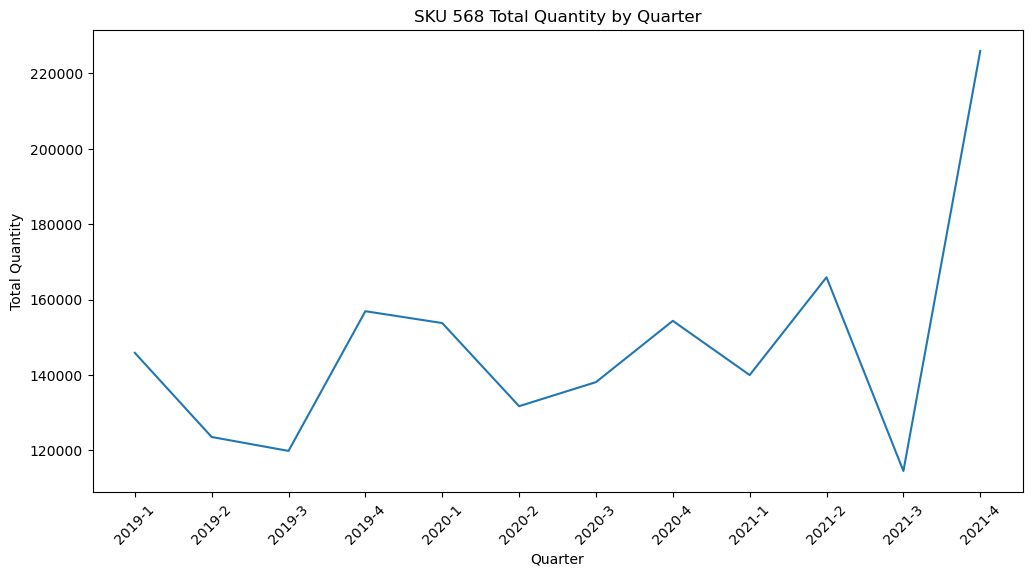

SKU 578
Year  Quarter
2019  1          102933
      2           89753
      3           76777
      4           97961
2020  1           98585
      2           87533
      3           79894
      4           78047
2021  1           91852
      2           81332
      3           60905
      4          109939
Name: TotalQuantity, dtype: int64


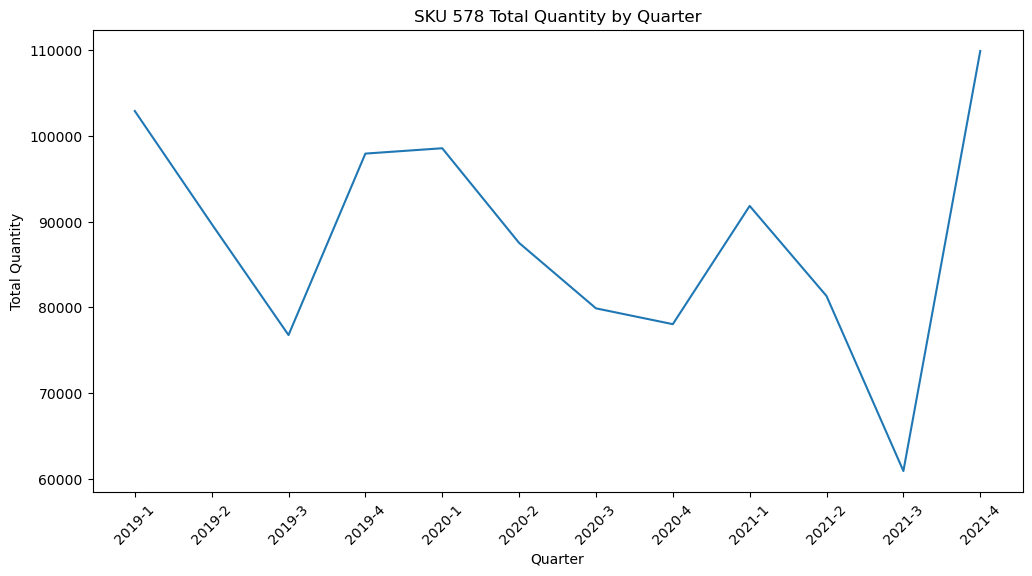

SKU 1050
Year  Quarter
2019  1          52981
      2          46656
      3          60115
      4          75765
2020  1          98657
      2          87386
      3          58010
      4          82377
2021  1          78269
      2          69268
      3          79958
      4          90674
Name: TotalQuantity, dtype: int64


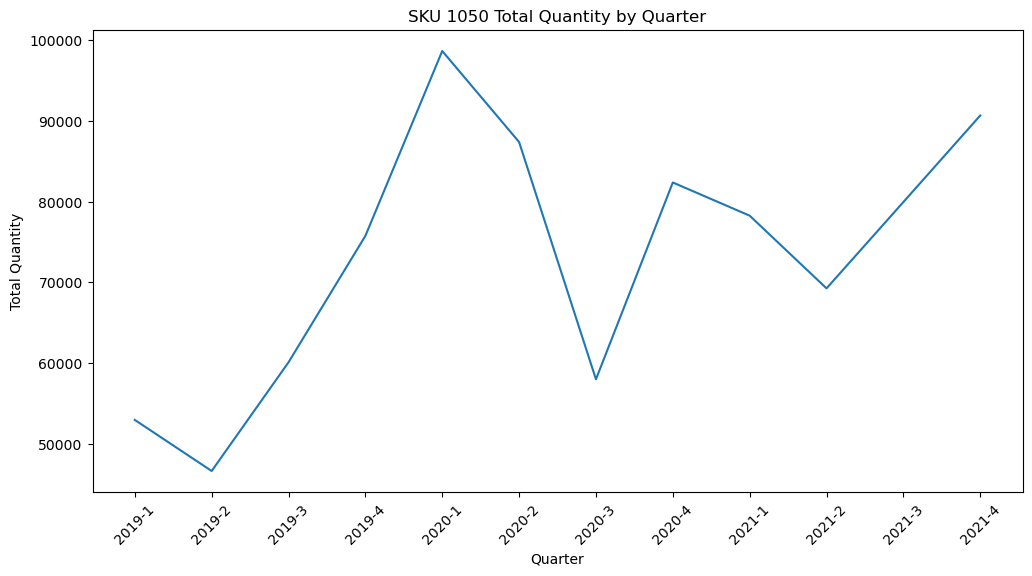

SKU 319
Year  Quarter
2019  1          46823
      2          42588
      3          42818
      4          49943
2020  1          56466
      2          49173
      3          50841
      4          59334
2021  1          62174
      2          53335
      3          52102
      4          76375
Name: TotalQuantity, dtype: int64


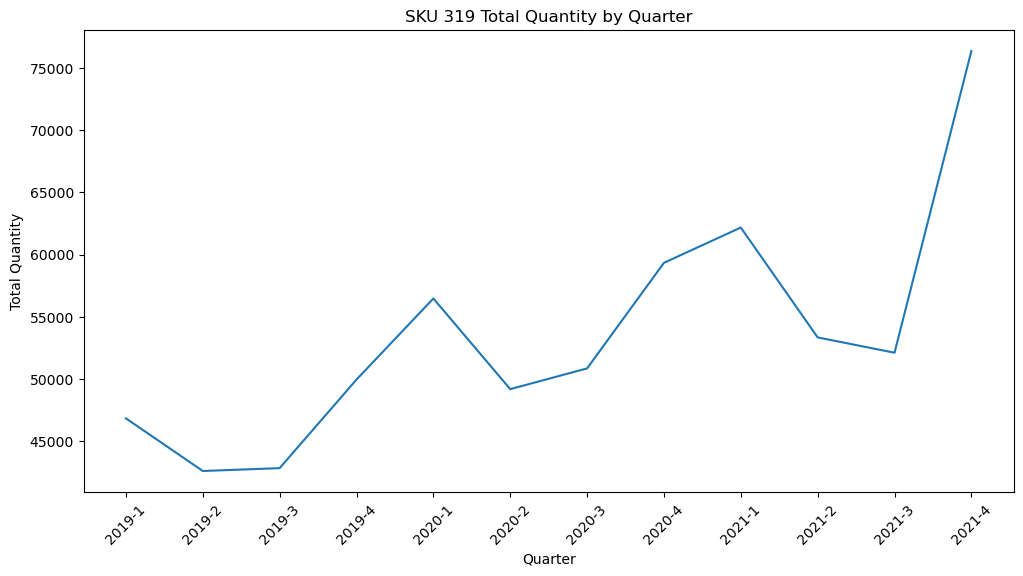

SKU 509
Year  Quarter
2019  1          43084
      2          35255
      3          30328
      4          35910
2020  1          39070
      2          40373
      3          32375
      4          34871
2021  1          38401
      2          32529
      3          30596
      4          36852
Name: TotalQuantity, dtype: int64


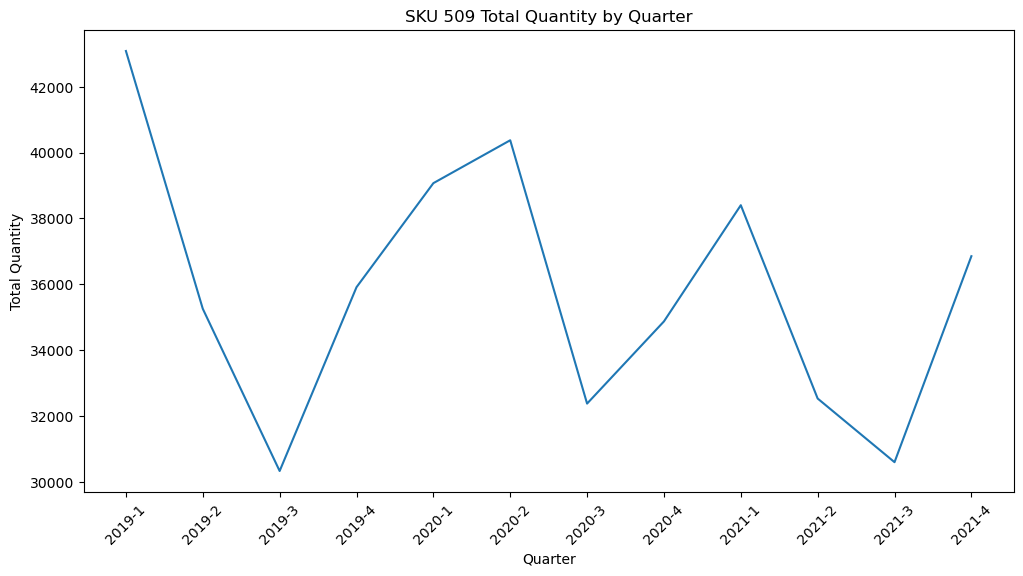

SKU 615
Year  Quarter
2019  1          37197
      2          32159
      3          26647
      4          31652
2020  1          36366
      2          39597
      3          35966
      4          35007
2021  1          39269
      2          32296
      3          27608
      4          36842
Name: TotalQuantity, dtype: int64


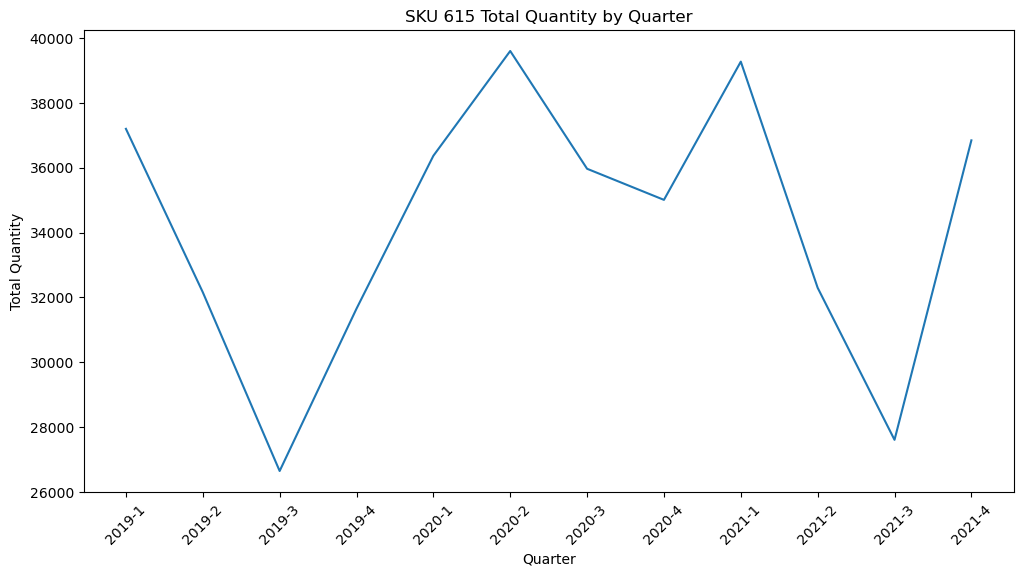

SKU 1018
Year  Quarter
2019  1          13937
      2          12767
      3          11758
      4          14721
2020  1          16743
      2          16719
      3          14319
      4          16976
2021  1          19435
      2          15390
      3          14559
      4          19213
Name: TotalQuantity, dtype: int64


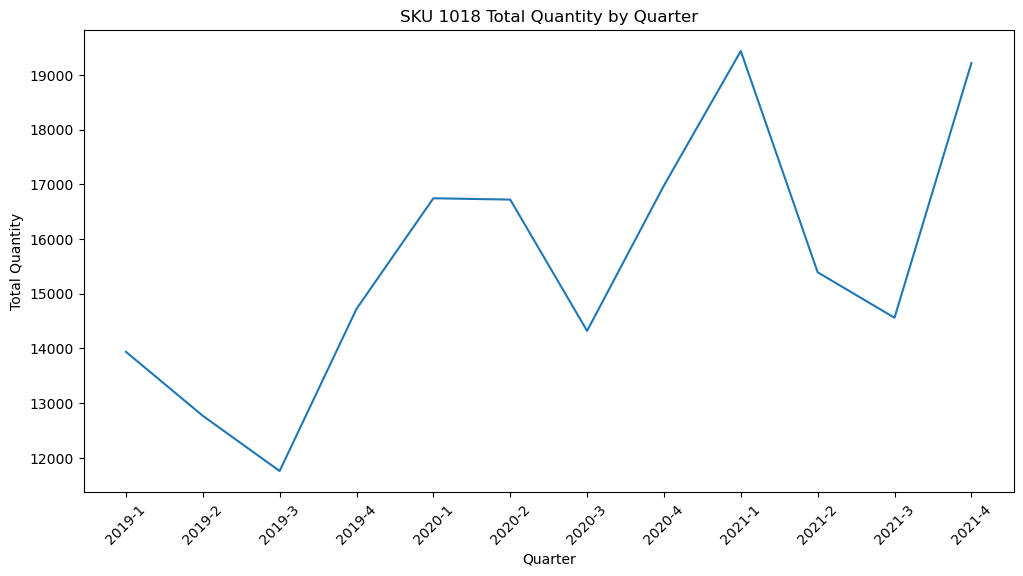

In [359]:
for sku_id in all_sku_ids:
    print(f'SKU {sku_id}')
    sku_data = quarterly_data[quarterly_data['SkuID'] == sku_id]
    sku_data.set_index(['Year', 'Quarter'], inplace=True)
    print(sku_data['TotalQuantity'])
    plot_sku(sku_id)

Control these:
- Trend 
- Seasonality
- Cyclical
- Random

SKU 568


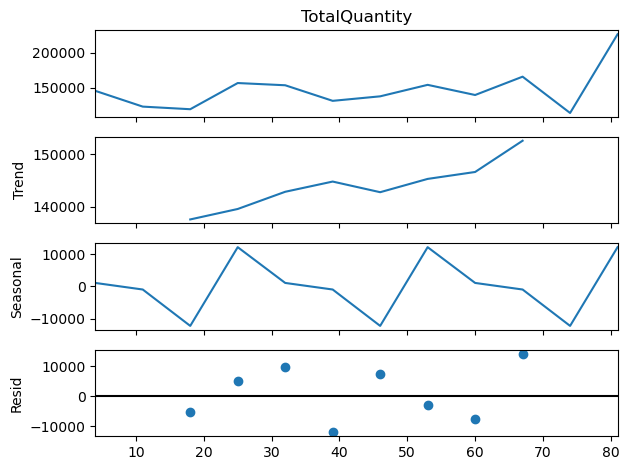

SKU 578


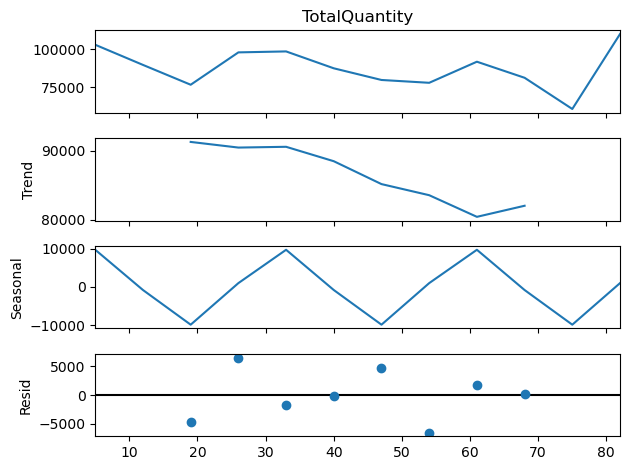

SKU 1050


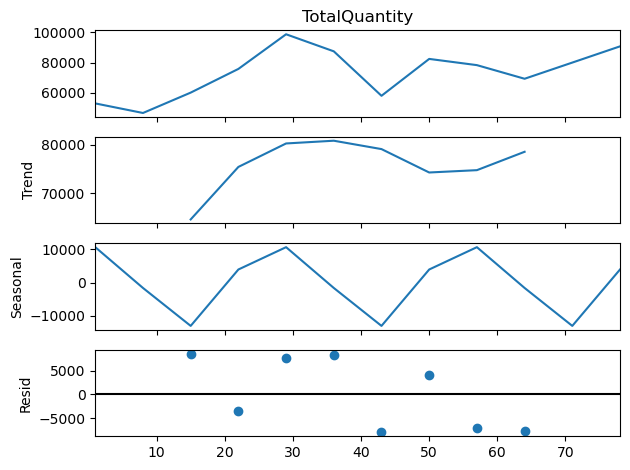

SKU 319


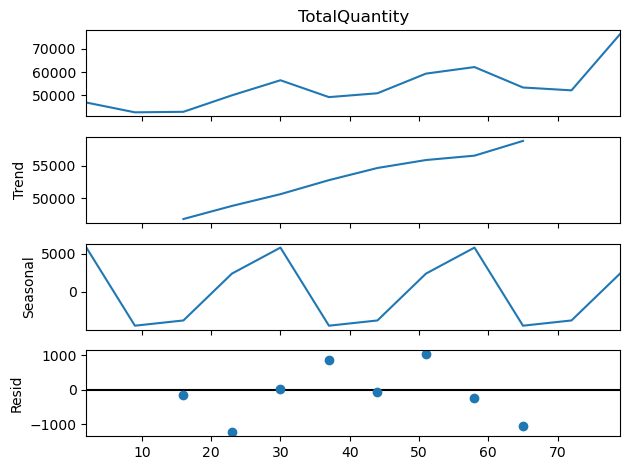

SKU 509


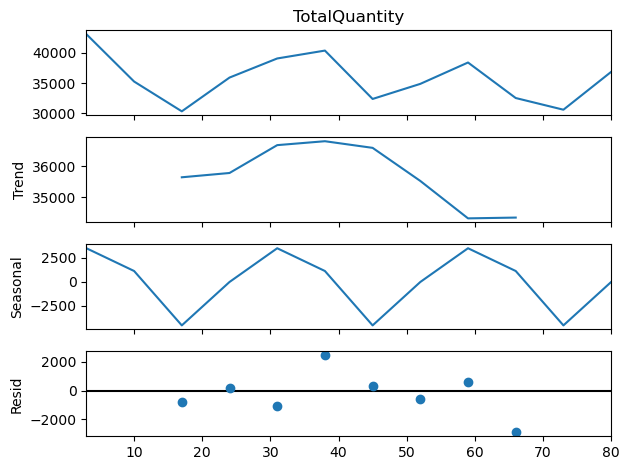

SKU 615


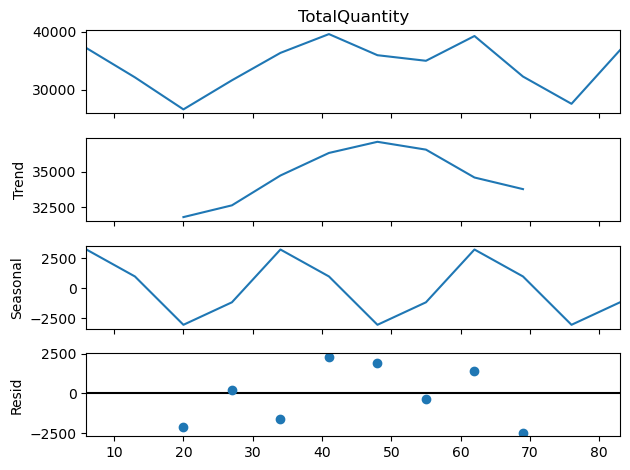

SKU 1018


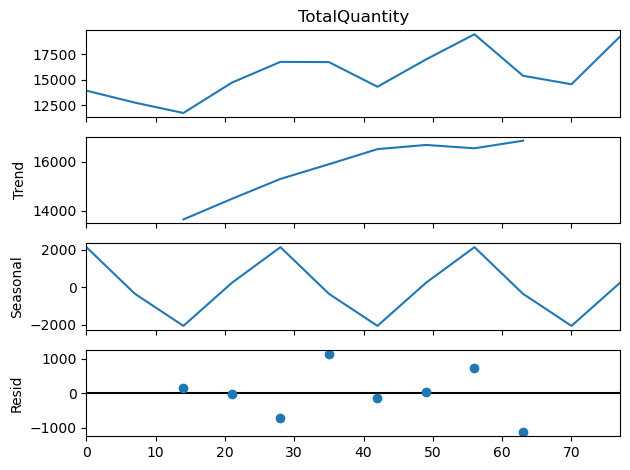

In [360]:
from statsmodels.tsa.seasonal import seasonal_decompose

for sku_id in all_sku_ids:
    print(f'SKU {sku_id}')
    sku_data = quarterly_data[quarterly_data['SkuID'] == sku_id]
    result = seasonal_decompose(sku_data['TotalQuantity'], model='additive', period=4)
    result.plot()
    plt.show()

# Forecasting

## Exponential Smoothing

In [416]:
def calculate_metrics(actual, forecast):
    mape = (abs(forecast - actual) / actual).mean()
    mse = ((forecast - actual) ** 2).mean()
    rmse = mse ** 0.5
    bias = (forecast - actual).mean()
    return mape, mse, rmse, bias

In [417]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing

exponential_smoothing_forecast = []

def forecast_sku_ExponentialSmoothing(sku_id):
    sku_data = quarterly_data[quarterly_data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=4).fit()
    forecast = model.forecast(4)
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    
    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    
    mape, mse, rmse, bias = calculate_metrics(test.values, forecast)
    exponential_smoothing_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})

    
    print(f'SKU {sku_id} Exponential Smoothing Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')

In [418]:
for sku_id in all_sku_ids:
    forecast_sku_ExponentialSmoothing(sku_id)

SKU 568 Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            152094  139976 -12118
     2            129495  165927  36432
     3            128604  114512 -14092
     4            159160  225966  66806

MAPE: 0.1812115014565409
MSE: 1533940662.0
RMSE: 39165.55453456519

SKU 578 Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             98056   91852  -6204
     2             85657   81332  -4325
     3             74441   60905 -13536
     4             88908  109939  21031

MAPE: 0.13356632389693576
MSE: 170680374.5
RMSE: 13064.469928014683

SKU 1050 Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             64242   78269  14027
     2             57915   69268  11353
     3             71369   79958   8589
     4             87021   90674   3653

MAPE: 0.12270524604

In [363]:
exponential_smoothing_forecast = pd.DataFrame(exponential_smoothing_forecast)
exponential_smoothing_forecast.set_index('sku_id', inplace=True)
exponential_smoothing_forecast

,mape,mse,rmse,bias
sku_id,,,,
568,0.181,1.533941e+09,39165.555,-19257.00
578,0.134,1.706804e+08,13064.470,758.50
1050,0.123,1.031907e+08,10158.281,-9405.50
319,0.079,8.609675e+07,9278.834,-5668.25
509,0.060,7.612652e+06,2759.103,1560.00
615,0.124,2.088601e+07,4570.121,2976.75
1018,0.076,2.577900e+06,1605.584,-659.00


## Moving Average

Moving average is a simple forecasting method that calculates the average of the previous n observations. It is used to smooth out short-term fluctuations and highlight longer-term trends or cycles.



#### How to determine the period of the moving average?

First, we need to determine the period of the moving average. We can use the Mean Absolute Percentage Error (MAPE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and bias to evaluate the performance of the moving average method. 

The period with the lowest MAPE, MSE, RMSE, and bias values will be the best period for the moving average method.



In [364]:
sku_data = quarterly_data[quarterly_data['SkuID'] == '568']
train = sku_data['TotalQuantity'][:-4]
test = sku_data['TotalQuantity'][-4:]

results = []

for i in range(2, 6):
    forecast = train.rolling(window=i).mean().iloc[-4:]
    forecast = forecast.astype(int)
    mape, mse, rmse, bias = calculate_metrics(test.values, forecast)
    results.append({'period': i, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})

results = pd.DataFrame(results)
results.set_index('period', inplace=True)
results

,mape,mse,rmse,bias
period,,,,
2,0.195,1.886954e+09,43439.086,-16793.00
3,0.186,2.054670e+09,45328.469,-18208.00
4,0.198,2.055528e+09,45337.928,-19426.00
5,0.187,1.930342e+09,43935.656,-20551.25


In [365]:
moving_average_forecast = []

def forecast_sku_MovingAverage(sku_id):
    # make 2 period moving average forecast
    sku_data = quarterly_data[quarterly_data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    forecast = train.rolling(window=2).mean().iloc[-4:]
    forecast = forecast.astype(int)
    
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual':
                                test.values, 'Error': test.values - forecast})
    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    
    mape, mse, rmse, bias = calculate_metrics(test.values, forecast)
    moving_average_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})
    
    print(f'SKU {sku_id} Moving Average Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')

In [366]:
for sku_id in all_sku_ids:
    forecast_sku_MovingAverage(sku_id)

SKU 568 Moving Average Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            155342  139976 -15366
     2            142739  165927  23188
     3            134901  114512 -20389
     4            146227  225966  79739

MAPE: 0.1951139736428975
MSE: 1886954185.5
RMSE: 43439.08591925019

SKU 578 Moving Average Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             98273   91852  -6421
     2             93059   81332 -11727
     3             83713   60905 -22808
     4             78970  109939  30969

MAPE: 0.21756753850416632
MSE: 414508898.75
RMSE: 20359.491613250073

SKU 1050 Moving Average Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             87211   78269  -8942
     2             93021   69268 -23753
     3             72698   79958   7260
     4             70193   90674  20481

MAPE: 0.19345856970369815
MSE: 27908583

In [367]:
moving_average_forecast = pd.DataFrame(moving_average_forecast)
moving_average_forecast.set_index('sku_id', inplace=True)
moving_average_forecast

,mape,mse,rmse,bias
sku_id,,,,
568,0.195,1.886954e+09,43439.086,-16793.00
578,0.218,4.145089e+08,20359.492,2496.75
1050,0.193,2.790858e+08,16705.862,1238.50
319,0.118,1.345738e+08,11600.594,-8217.25
509,0.130,2.409163e+07,4908.322,2207.50
615,0.179,4.132887e+07,6428.754,2310.50
1018,0.132,7.287112e+06,2699.465,-1242.00


In [421]:
naive_forecast = []

def forecast_sku_Naive(sku_id):
    sku_data = quarterly_data[quarterly_data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    forecast = train.iloc[-1]
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    
    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    mape, mse, rmse, bias = calculate_metrics(test.values, forecast)
    naive_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})
    
    
    print(f'SKU {sku_id} Naive Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')
    

In [422]:
for sku_id in all_sku_ids:
    forecast_sku_Naive(sku_id)

SKU 568 Naive Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            154361  139976 -14385
     2            154361  165927  11566
     3            154361  114512 -39849
     4            154361  225966  71605

MAPE: 0.20933666399672202
MSE: 1763979851.75
RMSE: 41999.760139196034

SKU 578 Naive Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             78047   91852  13805
     2             78047   81332   3285
     3             78047   60905 -17142
     4             78047  109939  31892

MAPE: 0.19055724982646027
MSE: 378079269.5
RMSE: 19444.26057992435

SKU 1050 Naive Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             82377   78269  -4108
     2             82377   69268 -13109
     3             82377   79958  -2419
     4             82377   90674   8297

MAPE: 0.09087327934514079
MSE: 65853328.75
RMSE: 8115.00639248053

In [370]:
naive_forecast = pd.DataFrame(naive_forecast)
naive_forecast.set_index('sku_id', inplace=True)
naive_forecast

,mape,mse,rmse,bias
sku_id,,,,
568,0.209,1.763980e+09,41999.760,-7234.25
578,0.191,3.780793e+08,19444.261,-7960.00
1050,0.091,6.585333e+07,8115.006,2834.75
319,0.130,9.668778e+07,9832.994,-1662.50
509,0.089,1.003646e+07,3168.038,276.50
615,0.128,2.090665e+07,4572.379,1003.25
1018,0.128,4.852034e+06,2202.733,-173.25


## Seasonal Forecasting Methods

There are seasonal patterns in the quarterly_data. So, we can use forecasting methods that can capture the seasonality.
- Triple Exponential Smoothing
- ARIMA
- SARIMA

### Triple Exponential Smoothing

In [371]:
triple_exponential_smoothing_forecast = []

def forecast_sku_TripleExponentialSmoothing(sku_id):
    sku_data = quarterly_data[quarterly_data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=4, trend='add').fit()
    forecast = model.forecast(4)
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})

    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    
    mape, mse, rmse, bias = calculate_metrics(test.values, forecast)
    triple_exponential_smoothing_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})
    
    print(f'SKU {sku_id} Triple Exponential Smoothing Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')

    

In [372]:
for sku_id in all_sku_ids:
    forecast_sku_TripleExponentialSmoothing(sku_id)

SKU 568 Triple Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            161709  139976 -21733
     2            139646  165927  26281
     3            145978  114512 -31466
     4            172791  225966  53175

MAPE: 0.20593942569113707
MSE: 1245176007.75
RMSE: 35287.05155931847

SKU 578 Triple Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             94644   91852  -2792
     2             81172   81332    160
     3             68392   60905  -7487
     4             87178  109939  22761

MAPE: 0.09058152837787799
MSE: 145484788.5
RMSE: 12061.70752837259

SKU 1050 Triple Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            121266   78269 -42997
     2            109904   69268 -40636
     3             80652   79958   -694
     4            121213   90674 -3053

In [373]:
triple_exponential_smoothing_forecast = pd.DataFrame(triple_exponential_smoothing_forecast)
triple_exponential_smoothing_forecast.set_index('sku_id', inplace=True)
triple_exponential_smoothing_forecast

,mape,mse,rmse,bias
sku_id,,,,
568,0.206,1.245176e+09,35287.052,-6564.25
578,0.091,1.454848e+08,12061.708,-3160.50
1050,0.370,1.108285e+09,33290.910,28716.50
319,0.079,4.621449e+07,6798.124,-2875.50
509,0.075,1.094344e+07,3308.086,2549.00
615,0.164,3.077551e+07,5547.568,5286.00
1018,0.085,2.727552e+06,1651.530,916.75


### ARIMA

In [374]:
from statsmodels.tsa.arima.model import ARIMA

arima_forecast = []

def forecast_sku_ARIMA(sku_id):
    sku_data = quarterly_data[quarterly_data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    model = ARIMA(train, order=(1, 1, 1)).fit()
    forecast = model.forecast(steps=4)
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    
    mape = (abs(forecast - test.values) / test.values).mean()
    mse = ((forecast - test.values) ** 2).mean()
    
    rmse = mse ** 0.5
    bias = (forecast - test.values).mean()
    arima_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})
    
    print(f'SKU {sku_id} ARIMA Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')
    

In [375]:
for sku_id in all_sku_ids:
    forecast_sku_ARIMA(sku_id)

SKU 568 ARIMA Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            151601  139976 -11625
     2            151457  165927  14470
     3            151450  114512 -36938
     4            151449  225966  74517

MAPE: 0.20564916010672687
MSE: 1815430164.5
RMSE: 42607.86505447087

SKU 578 ARIMA Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             79021   91852  12831
     2             79245   81332   2087
     3             79296   60905 -18391
     4             79308  109939  30631

MAPE: 0.18648314624826967
MSE: 361369293.0
RMSE: 19009.715752740754

SKU 1050 ARIMA Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             80114   78269  -1845
     2             80143   69268 -10875
     3             80142   79958   -184
     4             80142   90674  10532

MAPE: 0.07475625801232283
MSE: 58156632.5
RMSE: 7626.049599891152


In [376]:
arima_forecast = pd.DataFrame(arima_forecast)
arima_forecast.set_index('sku_id', inplace=True)
arima_forecast

,mape,mse,rmse,bias
sku_id,,,,
568,0.206,1.815430e+09,42607.865,-10106.00
578,0.186,3.613693e+08,19009.716,-6789.50
1050,0.075,5.815663e+07,7626.050,593.00
319,0.128,1.000076e+08,10000.378,-2469.75
509,0.088,1.961854e+07,4429.282,-3246.00
615,0.121,1.885622e+07,4342.375,-714.75
1018,0.125,5.015902e+06,2239.621,-480.75


### SARIMA

In [377]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_forecast = []

def forecast_sku_SARIMA(sku_id):
    sku_data = quarterly_data[quarterly_data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4)).fit()
    forecast = model.forecast(steps=4)
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    
    mape = (abs(forecast - test.values) / test.values).mean()
    mse = ((forecast - test.values) ** 2).mean()
    
    rmse = mse ** 0.5
    bias = (forecast - test.values).mean()
    
    # store the SARIMA forecast values in the sarima_forecast table to compare with other forecasting methods
    sarima_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})
    print('===============\n')
    print(f'SKU {sku_id} ARIMA Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')


In [378]:
for sku_id in all_sku_ids:
    forecast_sku_SARIMA(sku_id)
    

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.10786D+00    |proj g|=  8.11347D-01

At iterate    5    f=  3.88460D+00    |proj g|=  6.49146D-02

At iterate   10    f=  3.84702D+00    |proj g|=  7.28310D-02

At iterate   15    f=  3.84303D+00    |proj g|=  1.20687D-02

At iterate   20    f=  3.84285D+00    |proj g|=  1.89468D-03

At iterate   25    f=  3.84283D+00    |proj g|=  3.31901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     29      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  3.83577D+00    |proj g|=  4.61188D-05

At iterate   25    f=  3.83576D+00    |proj g|=  8.83069D-04

At iterate   30    f=  3.83549D+00    |proj g|=  1.87745D-02

At iterate   35    f=  3.81099D+00    |proj g|=  1.95855D-01

At iterate   40    f=  3.62970D+00    |proj g|=  3.92799D-01

At iterate   45    f=  3.27727D+00    |proj g|=  8.96225D-01

SKU 578 ARIMA Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            165679   91852 -73827
     2            143462   81332 -62130
     3            121939   60905 -61034
     4            134853  109939 -24914

MAPE: 0.6991002484553929
MSE: 3414104845.25
RMSE: 58430.341820410395


At iterate   50    f=  3.20973D+00    |proj g|=  1.55150D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bo

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  3.16579D+00    |proj g|=  1.20881D-02

At iterate   40    f=  3.16434D+00    |proj g|=  1.16118D-01

At iterate   45    f=  3.16189D+00    |proj g|=  3.92484D-02

At iterate   50    f=  3.10161D+00    |proj g|=  4.25418D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58      1     0     0   4.254D-01   3.102D+00
  F =   3.1016053786024158     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

SKU 319 ARIMA Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             55640   62174   6534
     2             47351   533

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  3.56060D+00    |proj g|=  2.66863D-02

At iterate   40    f=  3.54618D+00    |proj g|=  5.82102D-02

At iterate   45    f=  3.35549D+00    |proj g|=  1.73097D-01

At iterate   50    f=  3.13345D+00    |proj g|=  1.82780D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     79      1     0     0   1.828D+00   3.133D+00
  F =   3.1334473556709836     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

SKU 509 ARIMA Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             47640   38401  -9239
     2             44535   325

 This problem is unconstrained.


In [379]:
sarima_forecast = pd.DataFrame(sarima_forecast)
sarima_forecast.set_index('sku_id', inplace=True)
sarima_forecast

,mape,mse,rmse,bias
sku_id,,,,
568,0.407,4.154596e+09,64456.156,53753.50
578,0.699,3.414105e+09,58430.342,55476.25
1050,0.758,3.615398e+09,60128.183,59987.75
319,0.126,1.075144e+08,10368.917,-8360.50
509,0.244,7.613258e+07,8725.398,8373.25
615,0.486,2.600438e+08,16125.873,15970.75
1018,0.161,8.812714e+06,2968.622,2536.25


## Comparison of Forecasting Methods

### Bias = (Actual - Forecasted) / n 
 Bias is the average of the differences between the forecasted values and the actual values. It is a measure of the accuracy of the forecasting method. The closer the bias value is to zero, the more accurate the forecasting method is.


In [380]:
all_forecasts_bias = pd.concat([exponential_smoothing_forecast['bias'], moving_average_forecast['bias'], naive_forecast['bias'], triple_exponential_smoothing_forecast['bias'], arima_forecast['bias'], sarima_forecast['bias']], axis=1)
all_forecasts_bias.columns = ['Exponential Smoothing', 'Moving Average', 'Naive', 'Triple Exponential Smoothing', 'ARIMA', 'SARIMA']
all_forecasts_bias

,Exponential Smoothing,Moving Average,Naive,Triple Exponential Smoothing,ARIMA,SARIMA
sku_id,,,,,,
568,-19257.00,-16793.00,-7234.25,-6564.25,-10106.00,53753.50
578,758.50,2496.75,-7960.00,-3160.50,-6789.50,55476.25
1050,-9405.50,1238.50,2834.75,28716.50,593.00,59987.75
319,-5668.25,-8217.25,-1662.50,-2875.50,-2469.75,-8360.50
509,1560.00,2207.50,276.50,2549.00,-3246.00,8373.25
615,2976.75,2310.50,1003.25,5286.00,-714.75,15970.75
1018,-659.00,-1242.00,-173.25,916.75,-480.75,2536.25


<Figure size 1200x600 with 0 Axes>

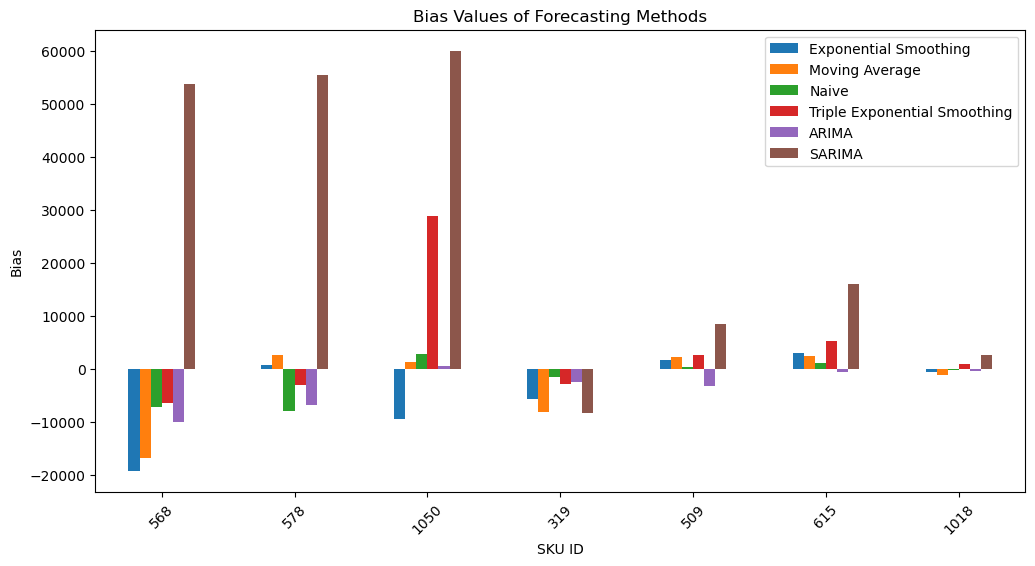

In [381]:
# Plot bias values of the forecasting methods
plt.figure(figsize=(12, 6))
all_forecasts_bias.plot(kind='bar', figsize=(12, 6))
plt.title('Bias Values of Forecasting Methods')
plt.xlabel('SKU ID')
plt.ylabel('Bias')
plt.xticks(rotation=45)
plt.show()


### MAPE = (|Actual - Forecasted| / Actual) / n

MAPE is the average of the absolute percentage differences between the forecasted values and the actual values. It is a measure of the prediction accuracy of a forecasting method. The lower the MAPE value, the more accurate the forecasting method is.

In [382]:
all_forecasts_mape = pd.concat([exponential_smoothing_forecast['mape'], moving_average_forecast['mape'], naive_forecast['mape'], triple_exponential_smoothing_forecast['mape'], arima_forecast['mape'], sarima_forecast['mape']], axis=1)
all_forecasts_mape.columns = ['Exponential Smoothing', 'Moving Average', 'Naive', 'Triple Exponential Smoothing', 'ARIMA', 'SARIMA']
all_forecasts_mape

,Exponential Smoothing,Moving Average,Naive,Triple Exponential Smoothing,ARIMA,SARIMA
sku_id,,,,,,
568,0.181,0.195,0.209,0.206,0.206,0.407
578,0.134,0.218,0.191,0.091,0.186,0.699
1050,0.123,0.193,0.091,0.370,0.075,0.758
319,0.079,0.118,0.130,0.079,0.128,0.126
509,0.060,0.130,0.089,0.075,0.088,0.244
615,0.124,0.179,0.128,0.164,0.121,0.486
1018,0.076,0.132,0.128,0.085,0.125,0.161


<Figure size 1200x600 with 0 Axes>

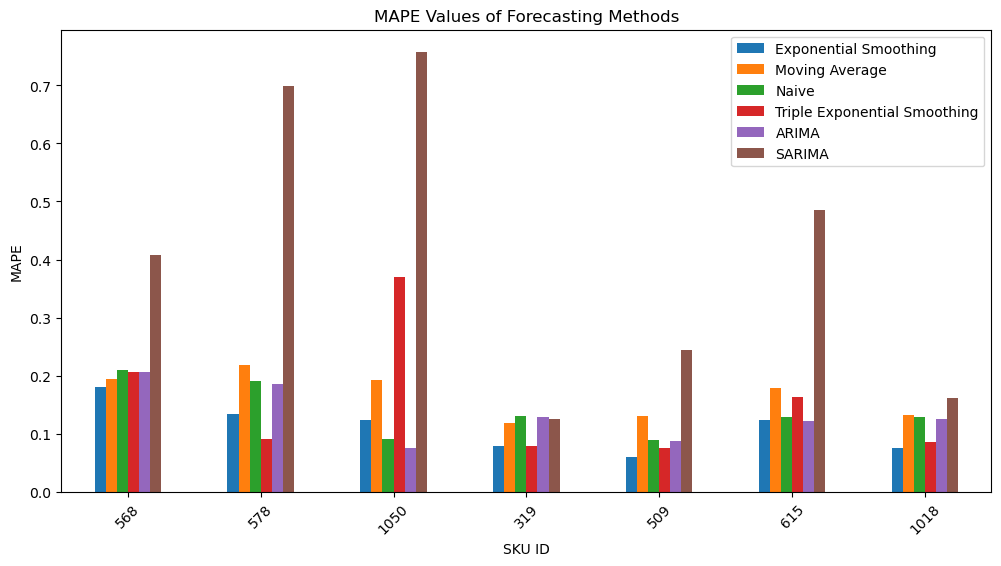

In [383]:
# Plot MAPE values of the forecasting methods
plt.figure(figsize=(12, 6))
all_forecasts_mape.plot(kind='bar', figsize=(12, 6))
plt.title('MAPE Values of Forecasting Methods')
plt.xlabel('SKU ID')
plt.ylabel('MAPE')
plt.xticks(rotation=45)
plt.show()

# Monthly Sales Analysis

Calculate the total sales of the choosen SKU's for monthly. It should be 36 rows in total for every SKU.

In [384]:
monthly_data = data.copy()

monthly_data['Year'] = monthly_data['Date'].dt.year
monthly_data['Month'] = monthly_data['Date'].dt.month

monthly_data = monthly_data.groupby(['Year', 'Month', 'SkuID']).agg({'TotalQuantity': 'sum'}).reset_index()
monthly_data

,Year,Month,SkuID,TotalQuantity
0,2019,1,1018,4559
1,2019,1,1050,19893
2,2019,1,319,16316
3,2019,1,509,13993
4,2019,1,568,54068
...,...,...,...,...
247,2021,12,319,28037
248,2021,12,509,13327
249,2021,12,568,54617
250,2021,12,578,27257


In [385]:
# Plot SKU sales for each month

def plot_sku_monthly(sku_id):
    sku = monthly_data[monthly_data['SkuID'] == sku_id]
    plt.figure(figsize=(12, 6))
    plt.plot(sku.index, sku['TotalQuantity'])
    plt.title(f'SKU {sku_id} Total Quantity by Month')
    plt.xlabel('Month')
    plt.ylabel('Total Quantity')
    plt.xticks(rotation=45)
    plt.show()

SKU 568
Year  Month
2019  1         54068
      2         56115
      3         35696
      4         40855
      5         51793
      6         30889
      7         40455
      8         35839
      9         43548
      10        46278
      11        59636
      12        51000
2020  1         71126
      2         45135
      3         37509
      4         36699
      5         44420
      6         50590
      7         42860
      8         44094
      9         51139
      10        70269
      11        42701
      12        41391
2021  1         58456
      2         42867
      3         38653
      4         43395
      5         40054
      6         82478
      7         32898
      8         30591
      9         51023
      10        48319
      11       123030
      12        54617
Name: TotalQuantity, dtype: int64


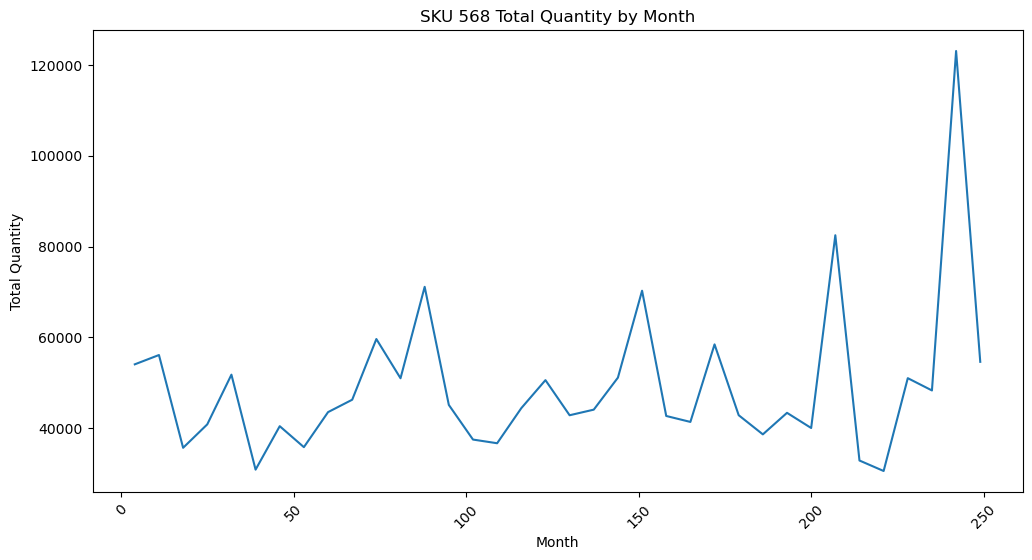

SKU 578
Year  Month
2019  1        35666
      2        39802
      3        27465
      4        33553
      5        30016
      6        26184
      7        26848
      8        22876
      9        27053
      10       33694
      11       30773
      12       33494
2020  1        38044
      2        34863
      3        25678
      4        25633
      5        28195
      6        33705
      7        27462
      8        19633
      9        32799
      10       19690
      11       29633
      12       28724
2021  1        33641
      2        23927
      3        34284
      4        30377
      5        21488
      6        29467
      7        15476
      8        21002
      9        24427
      10       23160
      11       59522
      12       27257
Name: TotalQuantity, dtype: int64


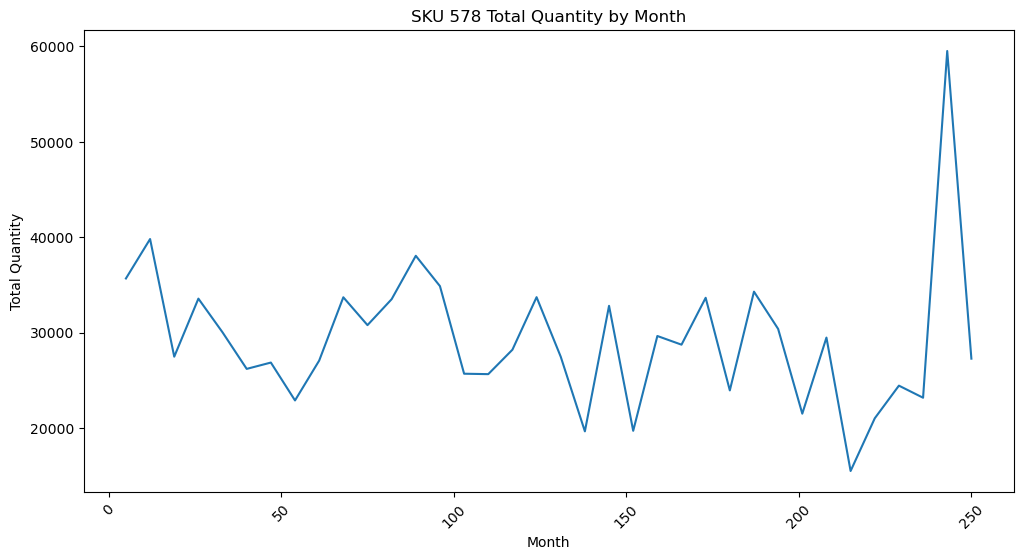

SKU 1050
Year  Month
2019  1        19893
      2        15298
      3        17790
      4        16777
      5        18261
      6        11618
      7        16940
      8        17132
      9        26043
      10       18288
      11       31647
      12       25830
2020  1        54784
      2        14459
      3        29414
      4        27154
      5        31898
      6        28334
      7        15182
      8        19447
      9        23381
      10       32982
      11       20448
      12       28947
2021  1        27512
      2        27942
      3        22815
      4        22999
      5        19766
      6        26503
      7        21951
      8        20913
      9        37094
      10       34359
      11       26593
      12       29722
Name: TotalQuantity, dtype: int64


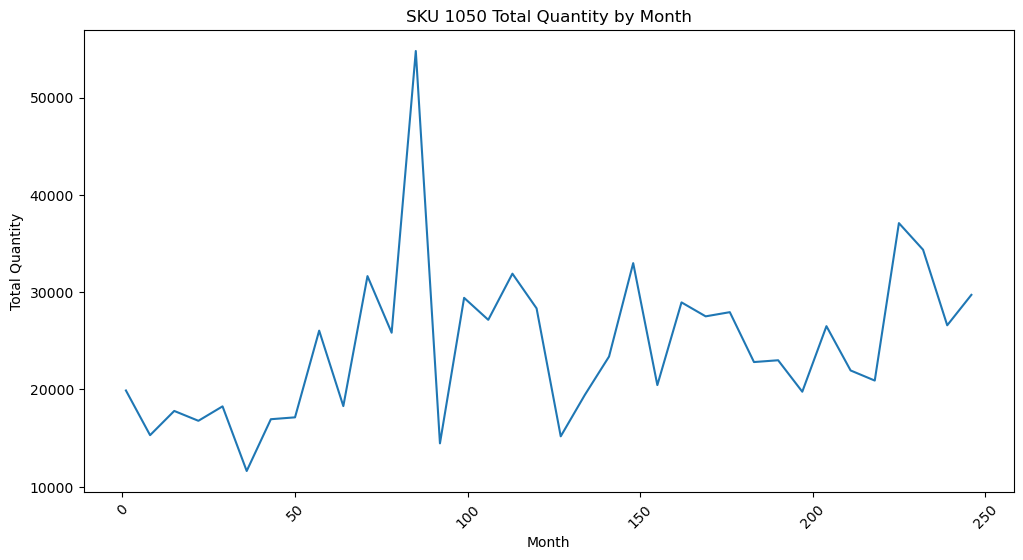

SKU 319
Year  Month
2019  1        16316
      2        16813
      3        13694
      4        14012
      5        16314
      6        12262
      7        14854
      8        13200
      9        14764
      10       15665
      11       16645
      12       17633
2020  1        21996
      2        17211
      3        17259
      4        17299
      5        16052
      6        15822
      7        15129
      8        15004
      9        20708
      10       18154
      11       18771
      12       22409
2021  1        22590
      2        20806
      3        18778
      4        17973
      5        15924
      6        19438
      7        15205
      8        16109
      9        20788
      10       21989
      11       26349
      12       28037
Name: TotalQuantity, dtype: int64


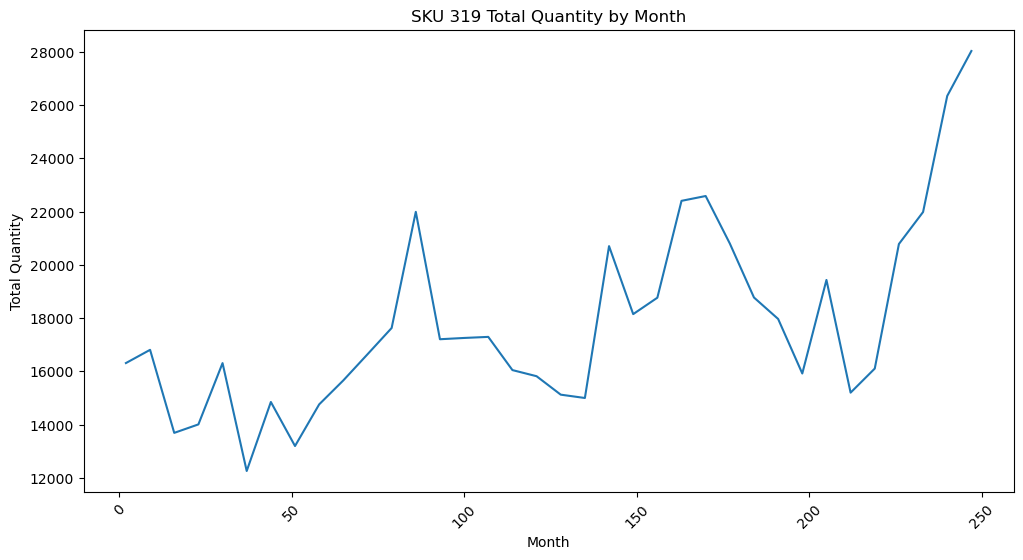

SKU 509
Year  Month
2019  1        13993
      2        13408
      3        15683
      4        10701
      5        12828
      6        11726
      7        10693
      8         8585
      9        11050
      10       11072
      11       11545
      12       13293
2020  1        13762
      2        12131
      3        13177
      4        16035
      5        13774
      6        10564
      7         8945
      8        10448
      9        12982
      10       10441
      11       11564
      12       12866
2021  1        12902
      2        12554
      3        12945
      4        10813
      5         9727
      6        11989
      7         9087
      8         8778
      9        12731
      10       12324
      11       11201
      12       13327
Name: TotalQuantity, dtype: int64


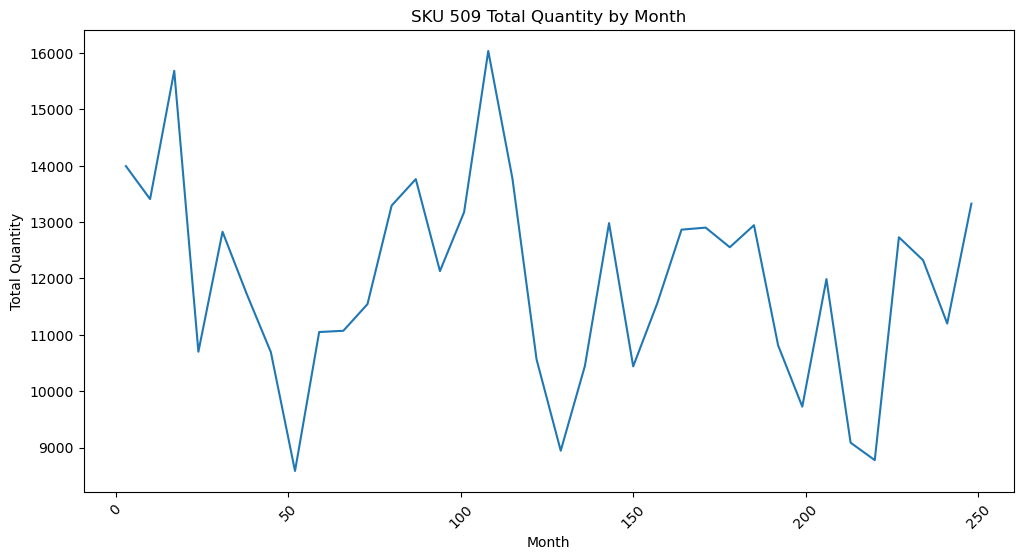

SKU 615
Year  Month
2019  1        11929
      2        13901
      3        11367
      4         9783
      5        12145
      6        10231
      7         9506
      8         7686
      9         9455
      10       11744
      11       10248
      12        9660
2020  1        14921
      2        11332
      3        10113
      4        17199
      5        13219
      6         9179
      7        12133
      8        10295
      9        13538
      10       12495
      11        9427
      12       13085
2021  1        16095
      2        12122
      3        11052
      4        11426
      5         9674
      6        11196
      7         7060
      8         7554
      9        12994
      10       12023
      11       12394
      12       12425
Name: TotalQuantity, dtype: int64


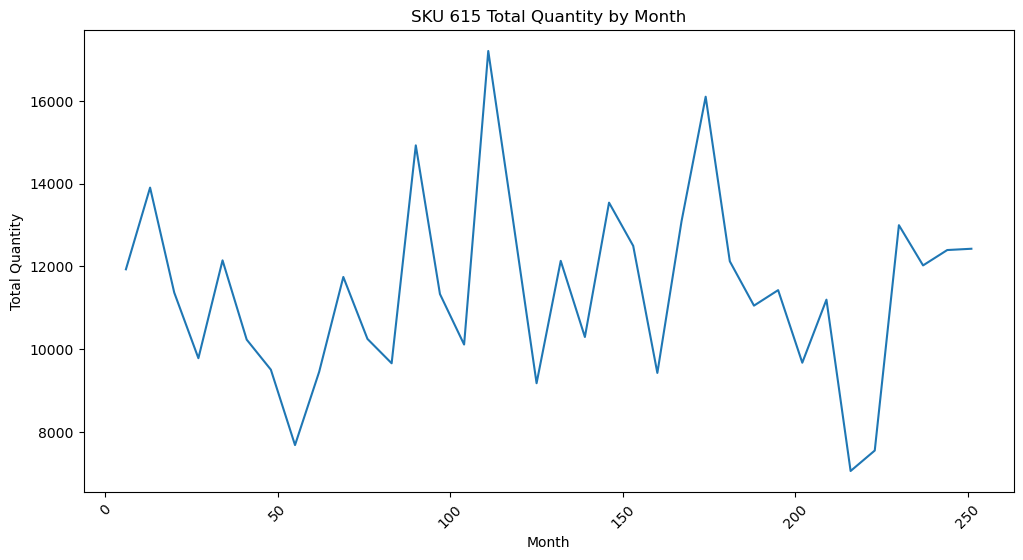

SKU 1018
Year  Month
2019  1        4559
      2        4822
      3        4556
      4        4251
      5        4887
      6        3629
      7        4235
      8        3460
      9        4063
      10       4643
      11       4884
      12       5194
2020  1        6598
      2        5234
      3        4911
      4        6835
      5        5468
      6        4416
      7        3683
      8        4169
      9        6467
      10       4805
      11       5570
      12       6601
2021  1        7145
      2        6714
      3        5576
      4        5188
      5        5011
      6        5191
      7        3765
      8        4199
      9        6595
      10       6168
      11       5995
      12       7050
Name: TotalQuantity, dtype: int64


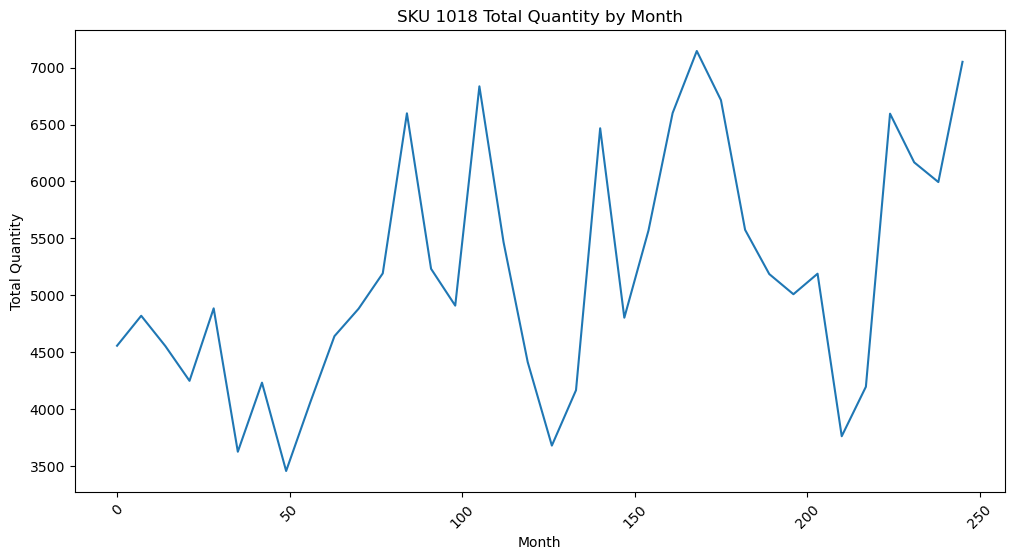

In [386]:
for sku_id in all_sku_ids:
    print(f'SKU {sku_id}')
    sku_data = monthly_data[monthly_data['SkuID'] == sku_id]
    sku_data.set_index(['Year', 'Month'], inplace=True)
    print(sku_data['TotalQuantity'])
    plot_sku_monthly(sku_id)

SKU 568


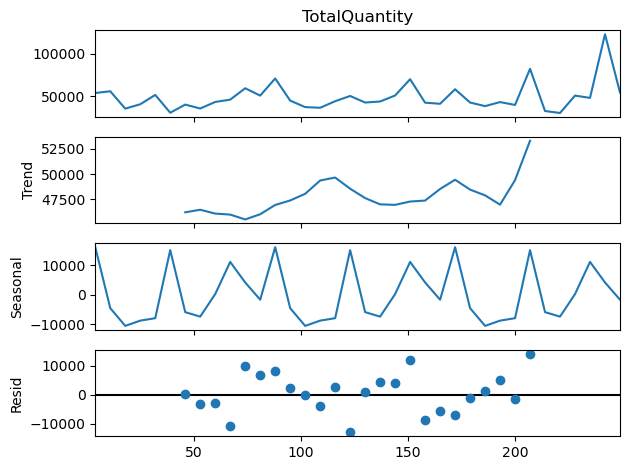

SKU 578


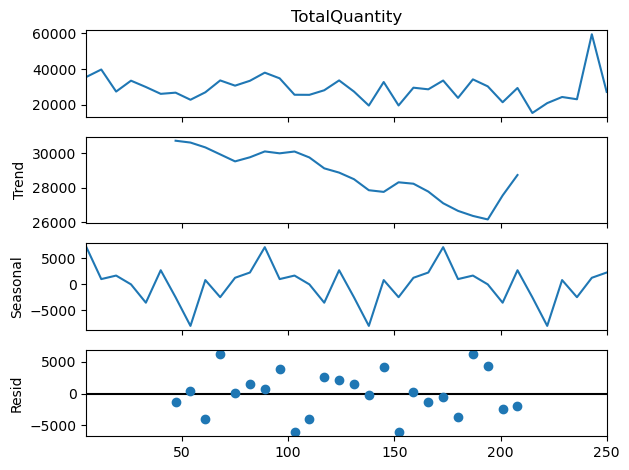

SKU 1050


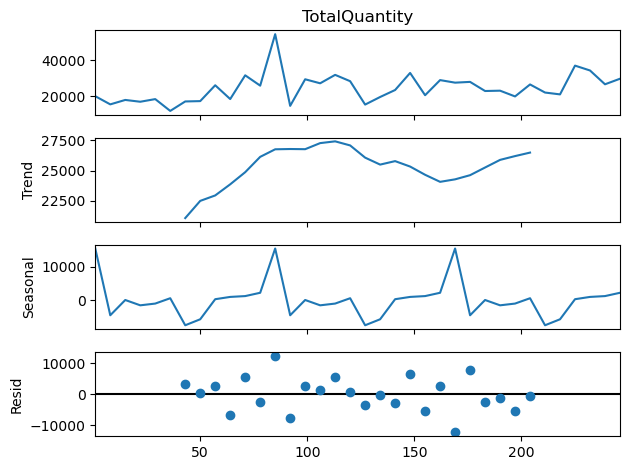

SKU 319


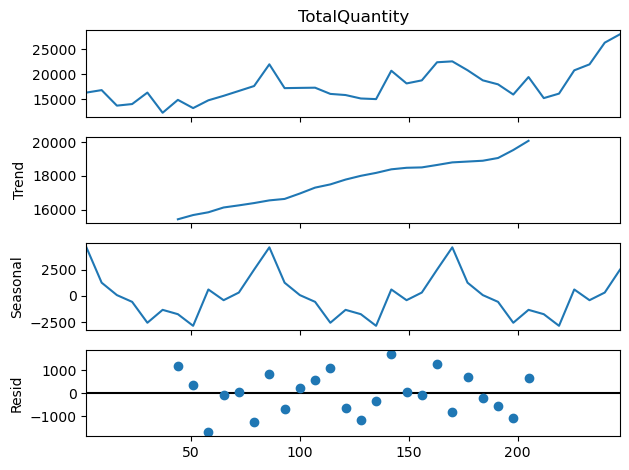

SKU 509


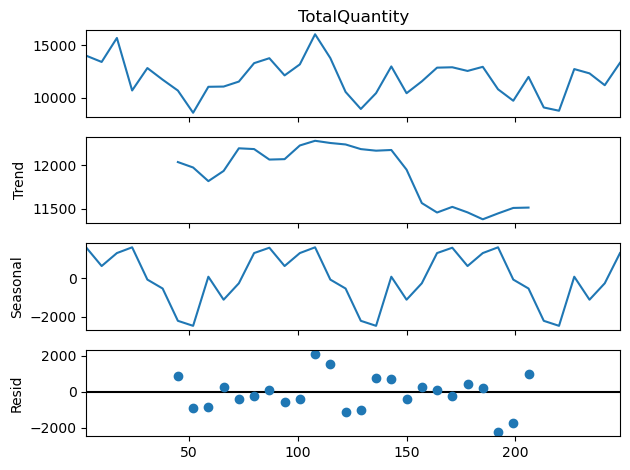

SKU 615


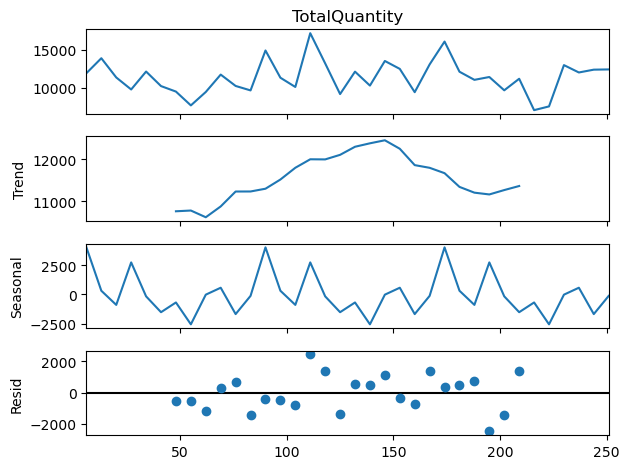

SKU 1018


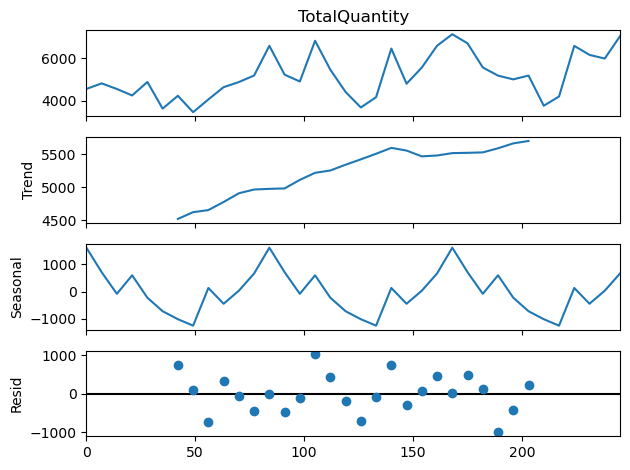

In [387]:
from statsmodels.tsa.seasonal import seasonal_decompose

for sku_id in all_sku_ids:
    print(f'SKU {sku_id}')
    sku_data = monthly_data[monthly_data['SkuID'] == sku_id]
    result = seasonal_decompose(sku_data['TotalQuantity'], model='additive', period=12)
    result.plot()
    plt.show()

In [388]:
monthly_data.set_index(['Year', 'Month'], inplace=True)
monthly_data

SkuID  TotalQuantity
Year Month                     
2019 1      1018           4559
     1      1050          19893
     1       319          16316
     1       509          13993
     1       568          54068
...          ...            ...
2021 12      319          28037
     12      509          13327
     12      568          54617
     12      578          27257
     12      615          12425

[252 rows x 2 columns]

## Forecasting

### Exponential Smoothing

In [389]:
exponential_smoothing_forecast_monthly = []

def forecast_sku_ExponentialSmoothing_monthly(sku_id):
    sku_data = monthly_data[monthly_data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()
    forecast = model.forecast(4)
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Month': [9, 10, 11, 12], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    
    forecast_table.set_index(['Year', 'Month'], inplace=True)
    mape, mse, rmse, bias = calculate_metrics(test.values, forecast)
    exponential_smoothing_forecast_monthly.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})
    
    print(f'SKU {sku_id} Exponential Smoothing Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')

In [390]:
for sku_id in all_sku_ids:
    forecast_sku_ExponentialSmoothing_monthly(sku_id)

SKU 568 Exponential Smoothing Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           43281   51023   7742
     10          46110   48319   2209
     11          59945  123030  63085
     12          50796   54617   3821

MAPE: 0.19504337883483502
MSE: 1014783877.75
RMSE: 31855.672614936262

SKU 578 Exponential Smoothing Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           28780   24427  -4353
     10          24483   23160  -1323
     11          28883   59522  30639
     12          29638   27257  -2381

MAPE: 0.20935833849049315
MSE: 241279105.0
RMSE: 15533.161461853153

SKU 1050 Exponential Smoothing Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           26261   37094  10833
     10          21434   34359  12925
     11          28522   26593  -1929
     12          24941   29722   4781

MAPE: 0.22540302385116978
MSE: 77747129.0
RMSE: 8817

In [391]:
exponential_smoothing_forecast_monthly = pd.DataFrame(exponential_smoothing_forecast_monthly)
exponential_smoothing_forecast_monthly.set_index('sku_id', inplace=True)
exponential_smoothing_forecast_monthly

,mape,mse,rmse,bias
sku_id,,,,
568,0.195,1.014784e+09,31855.673,-19214.25
578,0.209,2.412791e+08,15533.161,-5645.50
1050,0.225,7.774713e+07,8817.433,-6652.50
319,0.201,3.169683e+07,5629.994,-5094.50
509,0.063,9.477205e+05,973.509,-728.00
615,0.170,5.488453e+06,2342.745,-2134.75
1018,0.176,1.351913e+06,1162.718,-1137.50


### Moving Average

In [392]:
moving_average_forecast_monthly = []

def forecast_sku_MovingAverage_monthly(sku_id):
    sku_data = monthly_data[monthly_data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    forecast = train.rolling(window=4).mean().iloc[-4:]
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Month': [9, 10, 11, 12], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    forecast_table.set_index(['Year', 'Month'], inplace=True)
    
    mape, mse, rmse, bias = calculate_metrics(test.values, forecast)
    moving_average_forecast_monthly.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})
    
    print(f'SKU {sku_id} Moving Average Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')
    


In [393]:
for sku_id in all_sku_ids:
    forecast_sku_MovingAverage_monthly(sku_id)

SKU 568 Moving Average Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           41242   51023   9781
     10          51145   48319  -2826
     11          49706  123030  73324
     12          46505   54617   8112

MAPE: 0.24867351878060365
MSE: 1386466939.25
RMSE: 37235.2915827176

SKU 578 Moving Average Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           27519   24427  -3092
     10          28904   23160  -5744
     11          24202   59522  35320
     12          21858   27257   5399

MAPE: 0.2915166640578022
MSE: 329801400.25
RMSE: 18160.435023699185

SKU 1050 Moving Average Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           23380   37094  13714
     10          23020   34359  11339
     11          22804   26593   3789
     12          22283   29722   7439

MAPE: 0.2731229749552543
MSE: 96585489.75
RMSE: 9827.791702615597

SKU 319 

In [394]:
moving_average_forecast_monthly = pd.DataFrame(moving_average_forecast_monthly)
moving_average_forecast_monthly.set_index('sku_id', inplace=True)
moving_average_forecast_monthly

,mape,mse,rmse,bias
sku_id,,,,
568,0.249,1.386467e+09,37235.292,-22097.75
578,0.292,3.298014e+08,18160.435,-7970.75
1050,0.273,9.658549e+07,9827.792,-9070.25
319,0.263,5.891637e+07,7675.700,-6740.25
509,0.126,3.705263e+06,1924.906,-1601.75
615,0.185,6.068753e+06,2463.484,-2305.25
1018,0.214,2.389497e+06,1545.800,-1404.00


### Naive

In [395]:
naive_forecast_monthly = []

def forecast_sku_Naive_monthly(sku_id):
    sku_data = monthly_data[monthly_data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    forecast = train.iloc[-1]
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Month': [9, 10, 11, 12], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    forecast_table.set_index(['Year', 'Month'], inplace=True)
    mape, mse, rmse, bias = calculate_metrics(test.values, forecast)
    naive_forecast_monthly.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})
    
    print(f'SKU {sku_id} Naive Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')

In [396]:
for sku_id in all_sku_ids:
    forecast_sku_Naive_monthly(sku_id)

SKU 568 Naive Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           30591   51023  20432
     10          30591   48319  17728
     11          30591  123030  92439
     12          30591   54617  24026

MAPE: 0.489648715235007
MSE: 2463491501.25
RMSE: 49633.57232005369

SKU 578 Naive Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           21002   24427   3425
     10          21002   23160   2158
     11          21002   59522  38520
     12          21002   27257   6255

MAPE: 0.27750739980538874
MSE: 384825753.5
RMSE: 19616.97615587071

SKU 1050 Naive Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           20913   37094  16181
     10          20913   34359  13446
     11          20913   26593   5680
     12          20913   29722   8809

MAPE: 0.3343811105186787
MSE: 138120139.5
RMSE: 11752.452488736128

SKU 319 Naive Forecast

            

In [397]:
naive_forecast_monthly = pd.DataFrame(naive_forecast_monthly)
naive_forecast_monthly.set_index('sku_id', inplace=True)
naive_forecast_monthly

,mape,mse,rmse,bias
sku_id,,,,
568,0.490,2.463492e+09,49633.572,-38656.25
578,0.278,3.848258e+08,19616.976,-12589.50
1050,0.334,1.381201e+08,11752.452,-11029.00
319,0.327,7.590056e+07,8712.093,-8181.75
509,0.289,1.369116e+07,3700.157,-3617.75
615,0.393,2.417945e+07,4917.260,-4905.00
1018,0.347,5.242898e+06,2289.738,-2253.00


## Seasonal Forecasting Methods

There are seasonal patterns in the quarterly_data. So, we can use forecasting methods that can capture the seasonality.
- Triple Exponential Smoothing
- ARIMA
- SARIMA

### Triple Exponential Smoothing

In [398]:
triple_exponential_smoothing_forecast_monthly = []

def forecast_sku_TripleExponentialSmoothing_monthly(sku_id):
    sku_data = monthly_data[monthly_data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12, trend='add').fit()
    forecast = model.forecast(4)
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Month': [9, 10, 11, 12], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    forecast_table.set_index(['Year', 'Month'], inplace=True)
    
    mape, mse, rmse, bias = calculate_metrics(test.values, forecast)
    triple_exponential_smoothing_forecast_monthly.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})
    
    print(f'SKU {sku_id} Triple Exponential Smoothing Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')
    

In [399]:
for sku_id in all_sku_ids:
    forecast_sku_TripleExponentialSmoothing_monthly(sku_id)
    

SKU 568 Triple Exponential Smoothing Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           49455   51023   1568
     10          52494   48319  -4175
     11          66537  123030  56493
     12          57598   54617  -2981

MAPE: 0.15772423404193642
MSE: 805058664.75
RMSE: 28373.555729763586

SKU 578 Triple Exponential Smoothing Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           25202   24427   -775
     10          29991   23160  -6831
     11          28708   59522  30814
     12          30788   27257  -3531

MAPE: 0.24347775389367707
MSE: 252308435.75
RMSE: 15884.219708566108

SKU 1050 Triple Exponential Smoothing Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           28480   37094   8614
     10          23690   34359  10669
     11          30982   26593  -4389
     12          27474   29722   2248

MAPE: 0.19585348177168055
MSE: 

In [400]:
triple_exponential_smoothing_forecast_monthly = pd.DataFrame(triple_exponential_smoothing_forecast_monthly)
triple_exponential_smoothing_forecast_monthly.set_index('sku_id', inplace=True)
triple_exponential_smoothing_forecast_monthly

,mape,mse,rmse,bias
sku_id,,,,
568,0.158,8.050587e+08,28373.556,-12726.25
578,0.243,2.523084e+08,15884.220,-4919.25
1050,0.196,5.308635e+07,7286.038,-4285.50
319,0.158,2.076349e+07,4556.698,-4044.25
509,0.107,2.176111e+06,1475.165,-1338.75
615,0.187,6.517180e+06,2552.877,-2341.00
1018,0.149,9.836868e+05,991.810,-965.25


### ARIMA

In [401]:
arima_forecast_monthly = []

def forecast_sku_ARIMA_monthly(sku_id):
    sku_data = monthly_data[monthly_data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    model = ARIMA(train, order=(1, 1, 1)).fit()
    forecast = model.forecast(steps=4)
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Month': [9, 10, 11, 12], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    forecast_table.set_index(['Year', 'Month'], inplace=True)
    
    mape, mse, rmse, bias = calculate_metrics(test.values, forecast)
    arima_forecast_monthly.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})
    
    print(f'SKU {sku_id} ARIMA Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')

In [402]:
for sku_id in all_sku_ids:
    forecast_sku_ARIMA_monthly(sku_id)

SKU 568 ARIMA Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           44758   51023   6265
     10          45721   48319   2598
     11          45786  123030  77244
     12          45790   54617   8827

MAPE: 0.24150466114780464
MSE: 1522637823.5
RMSE: 39020.992087593055

SKU 578 ARIMA Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           25544   24427  -1117
     10          26914   23160  -3754
     11          27326   59522  32196
     12          27451   27257   -194

MAPE: 0.18896114478810644
MSE: 262990064.25
RMSE: 16216.968405037976

SKU 1050 ARIMA Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           22786   37094  14308
     10          22120   34359  12239
     11          22357   26593   4236
     12          22273   29722   7449

MAPE: 0.28796116683861006
MSE: 106985820.5
RMSE: 10343.395018077961

SKU 319 ARIMA Forecast

       

In [403]:
arima_forecast_monthly = pd.DataFrame(arima_forecast_monthly)
arima_forecast_monthly.set_index('sku_id', inplace=True)
arima_forecast_monthly

,mape,mse,rmse,bias
sku_id,,,,
568,0.242,1.522638e+09,39020.992,-23733.50
578,0.189,2.629901e+08,16216.968,-6782.75
1050,0.288,1.069858e+08,10343.395,-9558.00
319,0.308,6.810212e+07,8252.401,-7718.25
509,0.154,4.637184e+06,2153.412,-1949.75
615,0.197,6.495398e+06,2548.607,-2468.50
1018,0.258,3.014833e+06,1736.328,-1685.25


In [404]:
sarima_forecast_monthly = []

def forecast_sku_SARIMA_monthly(sku_id):
    sku_data = monthly_data[monthly_data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
    forecast = model.forecast(steps=4)
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Month': [9, 10, 11, 12], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    forecast_table.set_index(['Year', 'Month'], inplace=True)
    mape, mse, rmse, bias = calculate_metrics(test.values, forecast)
    sarima_forecast_monthly.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})
    
    print(f'SKU {sku_id} SARIMA Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')

In [405]:
for sku_id in all_sku_ids:
    forecast_sku_SARIMA_monthly(sku_id)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.74855D+00    |proj g|=  3.46517D-01

At iterate    5    f=  6.66035D+00    |proj g|=  4.10172D-02


 This problem is unconstrained.



At iterate   10    f=  6.64540D+00    |proj g|=  2.50228D-03

At iterate   15    f=  6.64519D+00    |proj g|=  1.95268D-03
SKU 568 SARIMA Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           34287   51023  16736
     10          48850   48319   -531
     11          30400  123030  92630
     12          31528   54617  23089

MAPE: 0.3786620081648382
MSE: 2348448619.5
RMSE: 48460.79466434697


At iterate   20    f=  6.64510D+00    |proj g|=  3.50999D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   3.510D-05   6.645D+00
  F =   6

 This problem is unconstrained.



At iterate   10    f=  6.19327D+00    |proj g|=  6.01142D-03

At iterate   15    f=  6.19278D+00    |proj g|=  3.63114D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     18      1     0     0   1.694D-05   6.193D+00
  F =   6.1927767802733706     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SKU 578 SARIMA Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           25328   24427   -901
     10          20762   23160   2398
     11          24794   59522  34728
     12          26539   27257    718

MAPE: 0.18755399871547526
MSE: 303277928.25
R

 This problem is unconstrained.



At iterate    5    f=  6.29240D+00    |proj g|=  5.88904D-03

At iterate   10    f=  6.29108D+00    |proj g|=  2.43446D-03

At iterate   15    f=  6.29078D+00    |proj g|=  3.92329D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   2.160D-05   6.291D+00
  F =   6.2907748685035267     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SKU 1050 SARIMA Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           29439   37094   7655
     10          23463   34359  10896
     11          32725   26593  -6132
     12          2941

 This problem is unconstrained.



At iterate    5    f=  5.65429D+00    |proj g|=  2.59805D-02

At iterate   10    f=  5.61048D+00    |proj g|=  1.21984D-01

At iterate   15    f=  5.58061D+00    |proj g|=  3.00826D-02

At iterate   20    f=  5.56932D+00    |proj g|=  1.28088D-03

At iterate   25    f=  5.56800D+00    |proj g|=  7.00433D-04

At iterate   30    f=  5.56676D+00    |proj g|=  1.02478D-02
SKU 319 SARIMA Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           20131   20788    657
     10          18500   21989   3489
     11          19014   26349   7335
     12          22032   28037   6005

MAPE: 0.17070874069305578
MSE: 25616755.0
RMSE: 5061.29973425799


At iterate   35    f=  5.54343D+00    |proj g|=  3.56260D-03

At iterate   40    f=  5.54336D+00    |proj g|=  8.76087D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BF

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   7.758D-06   5.437D+00
  F =   5.4369387646035703     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SKU 509 SARIMA Forecast

            Forecasted  Actual  Error
Year Month                           
2020 9           10725   12731   2006
     10           9691   12324   2633
     11          10340   11201    861
     12          11501   13327   1826

MAPE: 0.14627488146902995
MSE: 3758080.5
RMSE: 1938.5769265107847

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =  

In [406]:
sarima_forecast_monthly = pd.DataFrame(sarima_forecast_monthly)
sarima_forecast_monthly.set_index('sku_id', inplace=True)
sarima_forecast_monthly

,mape,mse,rmse,bias
sku_id,,,,
568,0.379,2.348449e+09,48460.795,-32981.00
578,0.188,3.032779e+08,17414.877,-9235.75
1050,0.191,5.375438e+07,7331.738,-3181.50
319,0.171,2.561676e+07,5061.300,-4371.50
509,0.146,3.758080e+06,1938.577,-1831.50
615,0.267,1.172328e+07,3423.927,-3339.50
1018,0.140,8.790172e+05,937.559,-907.75


In [407]:
all_forecasts_bias_monthly = pd.concat([exponential_smoothing_forecast_monthly['bias'], moving_average_forecast_monthly['bias'], naive_forecast_monthly['bias'], triple_exponential_smoothing_forecast_monthly['bias'], arima_forecast_monthly['bias'], sarima_forecast_monthly['bias']], axis=1)
all_forecasts_bias_monthly.columns = ['Exponential Smoothing', 'Moving Average', 'Naive', 'Triple Exponential Smoothing', 'ARIMA', 'SARIMA']
all_forecasts_bias_monthly


,Exponential Smoothing,Moving Average,Naive,Triple Exponential Smoothing,ARIMA,SARIMA
sku_id,,,,,,
568,-19214.25,-22097.75,-38656.25,-12726.25,-23733.50,-32981.00
578,-5645.50,-7970.75,-12589.50,-4919.25,-6782.75,-9235.75
1050,-6652.50,-9070.25,-11029.00,-4285.50,-9558.00,-3181.50
319,-5094.50,-6740.25,-8181.75,-4044.25,-7718.25,-4371.50
509,-728.00,-1601.75,-3617.75,-1338.75,-1949.75,-1831.50
615,-2134.75,-2305.25,-4905.00,-2341.00,-2468.50,-3339.50
1018,-1137.50,-1404.00,-2253.00,-965.25,-1685.25,-907.75


<Figure size 1200x600 with 0 Axes>

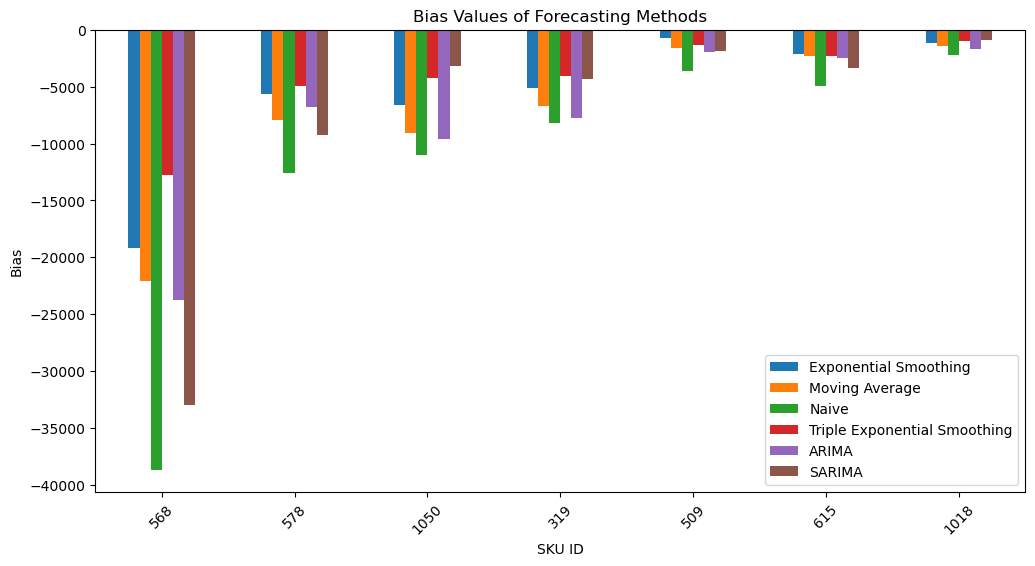

In [408]:
plt.figure(figsize=(12, 6))
all_forecasts_bias_monthly.plot(kind='bar', figsize=(12, 6))
plt.title('Bias Values of Forecasting Methods')
plt.xlabel('SKU ID')
plt.ylabel('Bias')
plt.xticks(rotation=45)
plt.show()


In [409]:
all_forecasts_mape_monthly = pd.concat([exponential_smoothing_forecast_monthly['mape'], moving_average_forecast_monthly['mape'], naive_forecast_monthly['mape'], triple_exponential_smoothing_forecast_monthly['mape'], arima_forecast_monthly['mape'], sarima_forecast_monthly['mape']], axis=1)
all_forecasts_mape_monthly.columns = ['Exponential Smoothing', 'Moving Average', 'Naive', 'Triple Exponential Smoothing', 'ARIMA', 'SARIMA']

all_forecasts_mape_monthly

,Exponential Smoothing,Moving Average,Naive,Triple Exponential Smoothing,ARIMA,SARIMA
sku_id,,,,,,
568,0.195,0.249,0.490,0.158,0.242,0.379
578,0.209,0.292,0.278,0.243,0.189,0.188
1050,0.225,0.273,0.334,0.196,0.288,0.191
319,0.201,0.263,0.327,0.158,0.308,0.171
509,0.063,0.126,0.289,0.107,0.154,0.146
615,0.170,0.185,0.393,0.187,0.197,0.267
1018,0.176,0.214,0.347,0.149,0.258,0.140


<Figure size 1200x600 with 0 Axes>

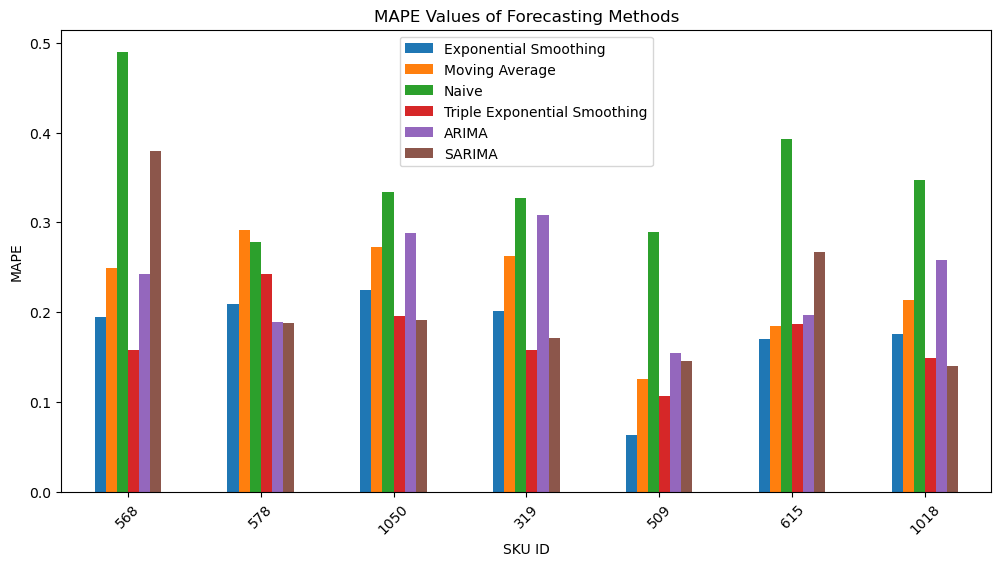

In [410]:

plt.figure(figsize=(12, 6))
all_forecasts_mape_monthly.plot(kind='bar', figsize=(12, 6))
plt.title('MAPE Values of Forecasting Methods')
plt.xlabel('SKU ID')
plt.ylabel('MAPE')
plt.xticks(rotation=45)
plt.show()
